<a href="https://colab.research.google.com/github/phelipe-sb/Rain-Prediction/blob/main/Cripto_Data_Miner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
moedas = ['AAVE', 'ACMFT', 'ACORDO01', 'ALLFT', 'AMFT', 'ANKR', 'ARGFT', 'ASRFT', 'ATMFT', 'AXS', 'BAL'
          , 'BAND', 'BARFT', 'BAT', 'BCH', 'BNT', 'BTC', 'CAIFT', 'CHZ', 'CITYFT', 'COMP', 'CRV', 'DAI', 'ENJ'
          , 'ETH', 'GALFT', 'GRT', 'IMOB01', 'IMOB02', 'JUVFT', 'KNC', 'LINK', 'LTC', 'MANA', 'MATIC', 'MBCONS01'
          , 'MBCONS02', 'MBFP01', 'MBFP02', 'MBFP03', 'MBFP04', 'MBFP05', 'MBPRK01', 'MBPRK02', 'MBPRK03', 'MBPRK04'
          , 'MBPRK05', 'MBVASCO01', 'MCO2', 'MKR', 'NAVIFT', 'OGFT', 'OMG', 'PAXG', 'PFLFT', 'PSGFT', 'REN', 'SAUBERFT'
          , 'SNX', 'SUSHI', 'THFT', 'UMA', 'UNI', 'USDC', 'WBTC', 'WBX', 'XRP', 'YFI', 'ZRX']

In [ ]:
req_moedas = list()
for moeda in moedas:
  r = requests.get(f'https://www.mercadobitcoin.net/api/{moeda}/ticker/')
  response = r.json()
  for i in response.values():
    dic = i
    dic['moeda'] = f'{moeda}'
    dic['extraction_datetime'] = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
    req_moedas.append(dic)

In [ ]:
df = pd.DataFrame(req_moedas)

In [ ]:
def convert_date(seconds):
  date = datetime.fromtimestamp(seconds).strftime("%A, %B %d, %Y %I:%M:%S")
  return date

In [ ]:
df.shape # 69 moedas diferentes

(69, 10)

In [ ]:
df['date_datetime'] = df['date'].apply(lambda x: convert_date(x))

In [ ]:
df['buy'] = df['buy'].astype('float')

In [ ]:
df = df.loc[df['buy'] < 50]
df = df.sort_values(by='buy', ascending=False)

In [ ]:
df.shape

(37, 11)

In [ ]:
df.head()

,high,low,vol,last,buy,sell,open,date,moeda,extraction_datetime,date_datetime
11,48.09800000,44.79328000,1138.80104845,47.36556000,47.36956,47.40000000,46.65291000,1631461025,BAND,12/09/2021 15:37:08,"Sunday, September 12, 2021 03:37:05"
1,47.54000000,43.87600000,1532.98793937,44.27628000,44.42000,44.81999000,44.58533000,1631461003,ACMFT,12/09/2021 15:37:07,"Sunday, September 12, 2021 03:36:43"
7,39.40000000,38.29010000,809.98479946,38.76915000,38.61596,39.22951000,39.10072000,1631461019,ASRFT,12/09/2021 15:37:07,"Sunday, September 12, 2021 03:36:59"
51,39.60000000,35.17697000,4313.99643342,37.71015000,37.49077,37.99520000,36.37988000,1631461029,OGFT,12/09/2021 15:37:11,"Sunday, September 12, 2021 03:37:09"
48,38.50000000,37.00000000,426.25802493,37.24001000,37.24001,38.39999000,37.75000000,1631461030,MCO2,12/09/2021 15:37:11,"Sunday, September 12, 2021 03:37:10"


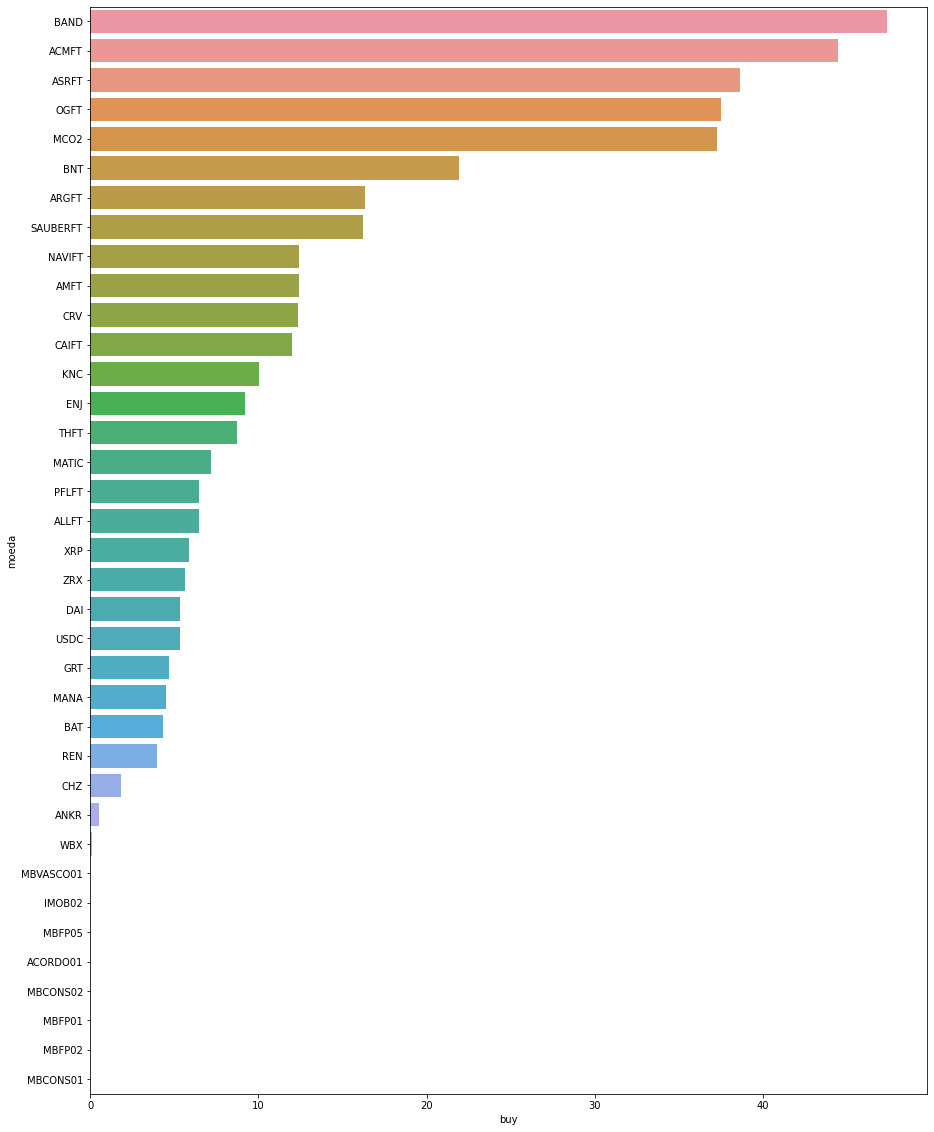

In [ ]:
plt.figure(figsize=(15, 20))
sns.barplot(x=df['buy'], y=df['moeda'], orient='horizontal')